In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split 


#import the decisiontree classifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import classification_report 

# for pre-processing 
from sklearn import preprocessing 


In [2]:
#import the datasets

iris = pd.read_csv("/home/chirag/jupyter/be_class/Datasets/Iris.csv", index_col=0)

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
# use label encoder to convert species into numbers

label_encoder = preprocessing.LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

In [6]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [7]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [8]:
iris.iloc[:,0:4]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [9]:
x = iris.iloc[:,0:4]
y = iris.iloc[:,4]

In [10]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [11]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [12]:
# Splitting the dataset into train and test 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=44)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

### Building Decision Tree Classifier using Entropy as a Criterion 

In [14]:
model =  DecisionTreeClassifier(criterion='entropy',max_depth = 4)

model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### PLot the decsion Tree

[Text(0.3333333333333333, 0.9, 'x[2] <= 2.6\nentropy = 1.584\nsamples = 120\nvalue = [41, 41, 38]'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.75\nentropy = 0.999\nsamples = 79\nvalue = [0, 41, 38]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.6666666666666666, 0.5, 'x[2] <= 5.15\nentropy = 0.454\nsamples = 42\nvalue = [0, 4, 38]'),
 Text(0.5, 0.3, 'x[3] <= 1.75\nentropy = 0.837\nsamples = 15\nvalue = [0, 4, 11]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.971\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.469\nsamples = 10\nvalue = [0, 1, 9]'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

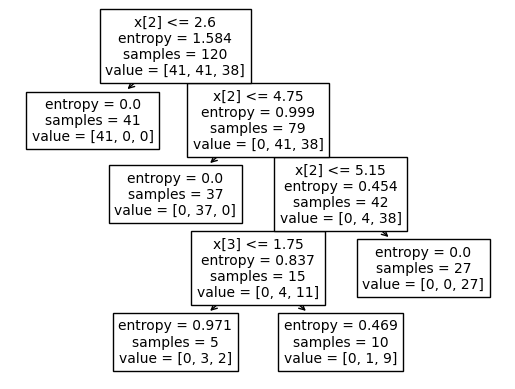

In [15]:
tree.plot_tree(model)

[Text(0.3333333333333333, 0.9, 'petal length (cm) <= 2.6\nentropy = 1.584\nsamples = 120\nvalue = [41, 41, 38]\nclass = setosa'),
 Text(0.16666666666666666, 0.7, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'petal length (cm) <= 4.75\nentropy = 0.999\nsamples = 79\nvalue = [0, 41, 38]\nclass = versicolor'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.6666666666666666, 0.5, 'petal length (cm) <= 5.15\nentropy = 0.454\nsamples = 42\nvalue = [0, 4, 38]\nclass = virginica'),
 Text(0.5, 0.3, 'petal width (cm) <= 1.75\nentropy = 0.837\nsamples = 15\nvalue = [0, 4, 11]\nclass = virginica'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.971\nsamples = 5\nvalue = [0, 3, 2]\nclass = versicolor'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.469\nsamples = 10\nvalue = [0, 1, 9]\nclass = virginica'),
 Text(0.8333333333333334, 0.3, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 27]\nclass = virginic

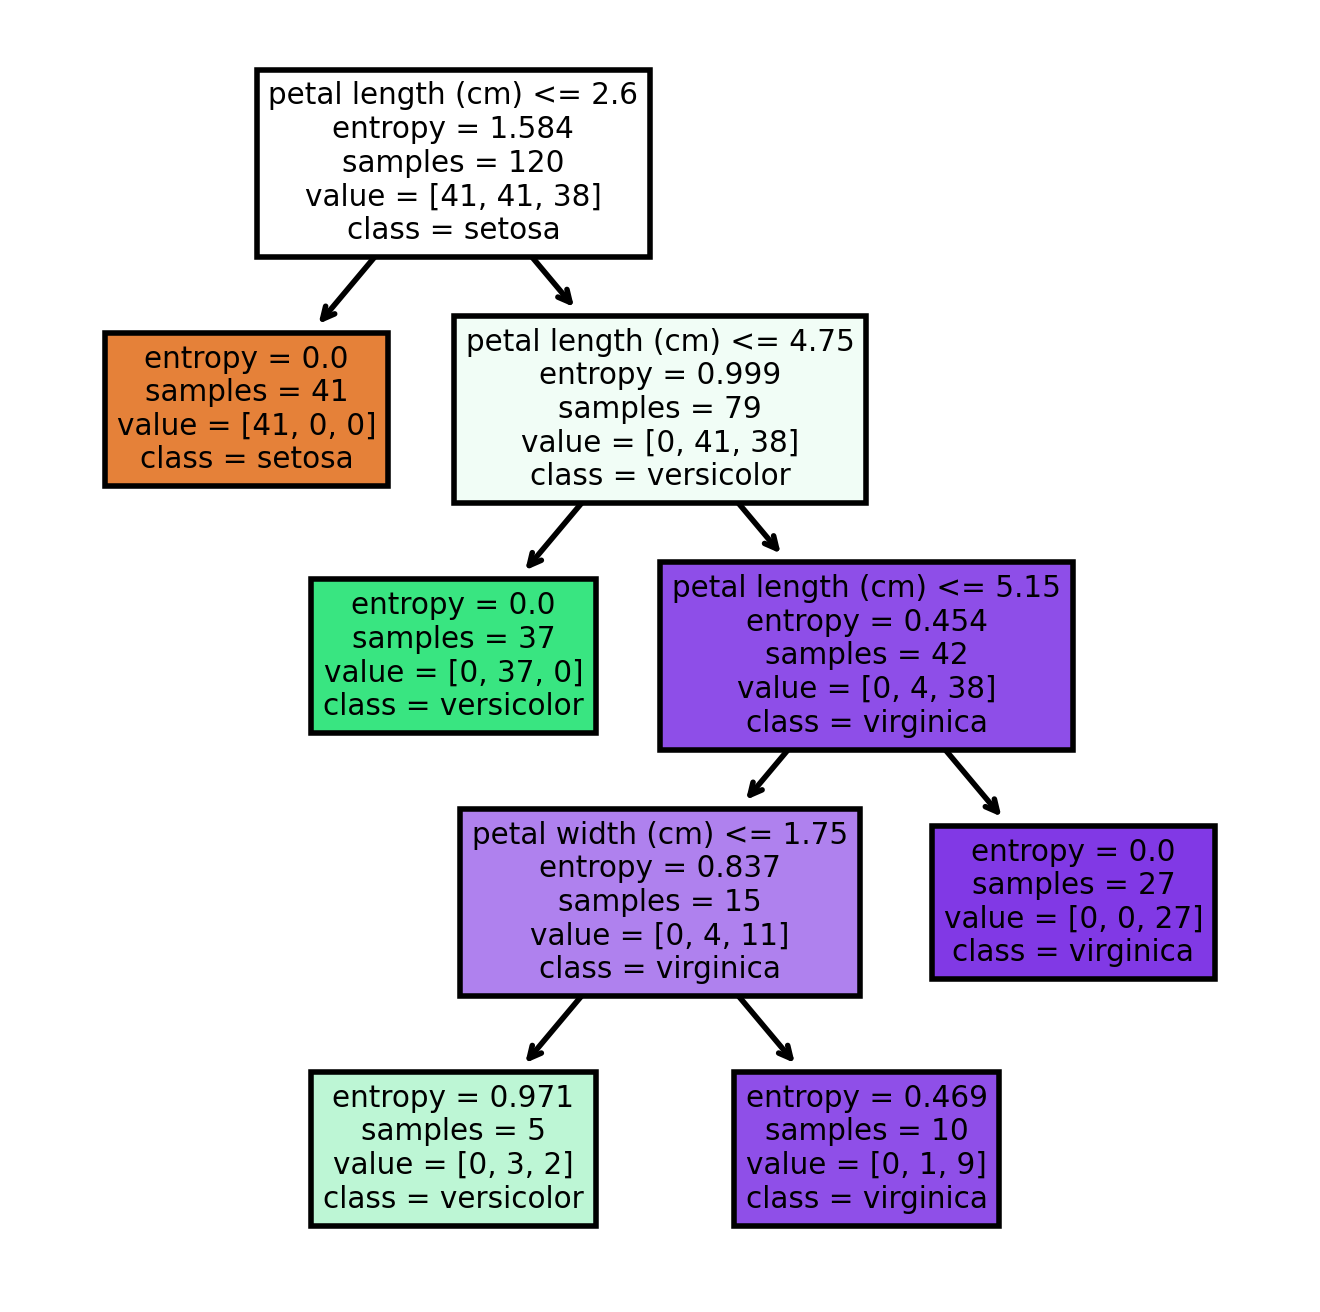

In [16]:
fn = ['sepal lenght(cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa','versicolor','virginica']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=400)
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)

### Prediction on the Test data

In [17]:
preds = model.predict(x_test)

In [18]:
pd.Series(preds).value_counts()

2    11
1    10
0     9
dtype: int64

In [19]:
y_test

Id
145    2
10     0
80     1
96     1
105    2
48     0
119    2
108    2
103    2
91     1
18     0
53     1
47     0
102    2
29     0
4      0
106    2
66     1
33     0
111    2
72     1
135    2
150    2
99     1
143    2
107    2
24     0
59     1
42     0
77     1
Name: Species, dtype: int64

### Crosstab : Way to understand the two way table between predicted vs actual 

In [20]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,9,0,0
1,0,9,0
2,0,1,11


### Accuracy of the above model 

In [21]:
np.mean(preds==y_test)

0.9666666666666667

## CART


### Buidling a Decision Tree using CART (gini) 

In [22]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd


In [23]:
#import the datasets

iris = pd.read_csv("/home/chirag/jupyter/be_class/Datasets/Iris.csv", index_col=0)

In [24]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
# use label encoder to convert species into numbers

label_encoder = preprocessing.LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

In [30]:
array = iris.values
x = array[:,0:4]
y = array[:,4]


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=5)

In [48]:
model = DecisionTreeRegressor()

In [49]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [50]:
model.score(x_test,y_test)

0.839572192513369